# Installating Packages

In [1]:
pip install numpy pandas scikit-learn nltk joblib

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.sparse import hstack
import json
import re

## Load dataset

In [3]:
DATA_PATH = "problems_data.jsonl"

records = []
with open(DATA_PATH, "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)
df.head(10)

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree
5,Mineral deposits,You handle signal processing for an extra-terr...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/boi23.mineral...
6,Multi-Class Binary Neural Network for Handwrit...,The objective of this problem is to train a Bi...,The program you submit should read no input.,,[],hard,9.6,https://open.kattis.com/problems/mnist10class
7,Bandit Raids,"Three rival gangs of bandits, the Marauders, t...",The input consists of $3$ space-separated posi...,"On the first line of output, print a single in...","[{'input': '3 8 2', 'output': '3 6 5 2 4 5 4 8...",hard,9.5,https://open.kattis.com/problems/banditraids
8,Breaking Bars,Selma is visited by her two grandchildren Elsa...,The first line of input contains two integers ...,Output the minimum number of breaks needed to ...,"[{'input': '4 15 1x2 2x2 3x3 3x5', 'output': '...",hard,9.5,https://open.kattis.com/problems/breakingbars
9,Special Cycle,You are given a simple undirected graph with n...,The first line of input contains three integer...,Output an integer denoting the length of the f...,[{'input': '8 10 3 1 2 4 5 7 8 2 3 3 4 1 4 5 6...,hard,9.5,https://open.kattis.com/problems/specialcycle


## Basic EDA

In [4]:
print(df.shape)

(4112, 8)


In [5]:
print("\nScore statistics:")
df["problem_score"].describe()


Score statistics:


,problem_score
count,4112.000000
mean,5.114689
std,2.177770
min,1.100000
25%,3.300000
50%,5.200000
75%,6.900000
max,9.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   sample_io           4112 non-null   object 
 5   problem_class       4112 non-null   object 
 6   problem_score       4112 non-null   float64
 7   url                 4112 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.1+ KB


## Class Distribution

In [7]:
print("Class distribution:")
print(df["problem_class"].value_counts())

Class distribution:
problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64


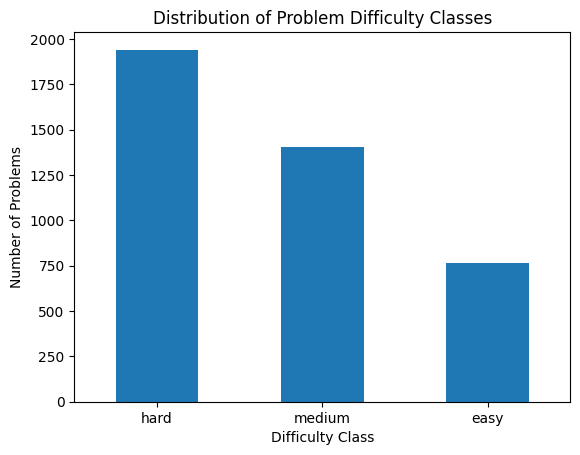

In [8]:
import matplotlib.pyplot as plt
df["problem_class"].value_counts().plot(
    kind="bar",
    title="Distribution of Problem Difficulty Classes",
    ylabel="Number of Problems",
    xlabel="Difficulty Class",
    rot=0
)
plt.show()


## Problem Score Distribution

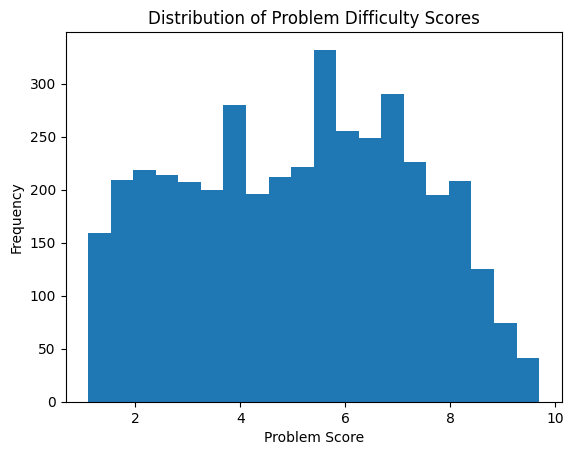

In [9]:
plt.hist(df["problem_score"], bins=20)
plt.xlabel("Problem Score")
plt.ylabel("Frequency")
plt.title("Distribution of Problem Difficulty Scores")
plt.show()

# Data Preprocessing

### Handling Missing Values

In [10]:
# Fill missing text fields with empty string
text_cols = ["title", "description", "input_description", "output_description"]

for col in text_cols:
    df[col] = df[col].fillna("")

# Drop rows where labels are missing
df = df.dropna(subset=["problem_class", "problem_score"])


### Combining Text Fields

In [11]:
cols = ["title", "description", "input_description", "output_description"]
df["combined_text"] = df[cols].fillna("").agg(" ".join, axis=1)

### Text Cleaning

In [12]:
df["combined_text"] = (
    df["combined_text"]
    .str.lower()
    .str.replace("\n", " ", regex=False)
    .str.replace(r"[^a-z0-9+\-*/=<>() ]", " ", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# Feature Extraction

## Text Length Features

In [13]:
df["text_length"] = df["combined_text"].apply(len)
df["word_count"] = df["combined_text"].apply(lambda x: len(x.split()))

## Mathematical Symbol Count

In [14]:
math_symbols = r"[+\-*/=<>]"
df["math_symbol_count"] = df["combined_text"].apply(
    lambda x: len(re.findall(math_symbols, x))
)

## Keyword-Based Difficulty Signals

In [15]:
keywords = [
    "graph", "tree", "dp", "dynamic programming",
    "recursion", "greedy", "binary search",
    "dfs", "bfs", "heap", "segment tree"
]

for kw in keywords:
    df[f"kw_{kw.replace(' ', '_')}"] = df["combined_text"].apply(
        lambda x: x.count(kw)
    )


# TF-IDF + Engineered Features

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,1),
    stop_words="english"
)
X_tfidf = tfidf.fit_transform(df["combined_text"])
engineered_features = df[
    ["text_length", "word_count", "math_symbol_count"]
].values
X = hstack([X_tfidf, engineered_features])

# Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

y_class = df["problem_class"]
y_score = df["problem_score"]

X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(
    X, y_class, y_score,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

# Difficulty Classification


## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=40,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf_clf.fit(X_train, y_class_train)

y_class_pred = rf_clf.predict(X_test)

print("Classifier(RF) Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("\nClassification Report:\n", classification_report(y_class_test, y_class_pred))

Classifier(RF) Accuracy: 0.5212636695018226

Classification Report:
               precision    recall  f1-score   support

        easy       0.46      0.47      0.46       153
        hard       0.57      0.79      0.66       389
      medium       0.39      0.17      0.24       281

    accuracy                           0.52       823
   macro avg       0.47      0.48      0.45       823
weighted avg       0.49      0.52      0.48       823



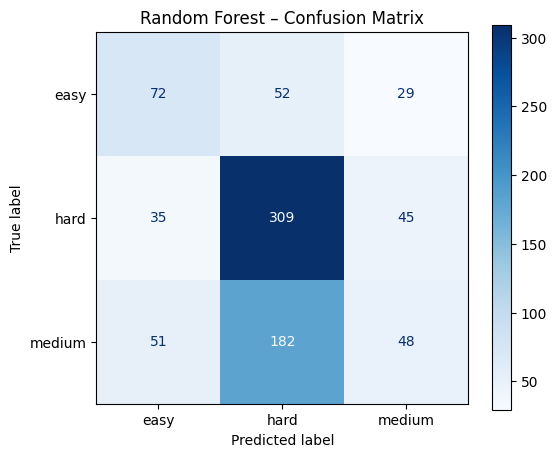

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["easy", "hard", "medium"]
cm = confusion_matrix(y_class_test, y_class_pred)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap="Blues", values_format="d")
plt.title("Random Forest – Confusion Matrix")
plt.show()

## Feature Selection by taking top 5000 features

In [20]:
import numpy as np
importances = rf_clf.feature_importances_
top_idx = np.argsort(importances)[-5000:]
X_train_rf = X_train[:, top_idx]
X_test_rf = X_test[:, top_idx]

rf_clf.fit(X_train_rf, y_class_train)
y_pred = rf_clf.predict(X_test_rf)


In [21]:
print("Improved(RF) Accuracy:", accuracy_score(y_class_test, y_pred))
print("Classification Report:\n", classification_report(y_class_test, y_pred))

Improved(RF) Accuracy: 0.5407047387606319
Classification Report:
               precision    recall  f1-score   support

        easy       0.47      0.48      0.47       153
        hard       0.58      0.81      0.68       389
      medium       0.44      0.20      0.27       281

    accuracy                           0.54       823
   macro avg       0.50      0.50      0.48       823
weighted avg       0.51      0.54      0.50       823



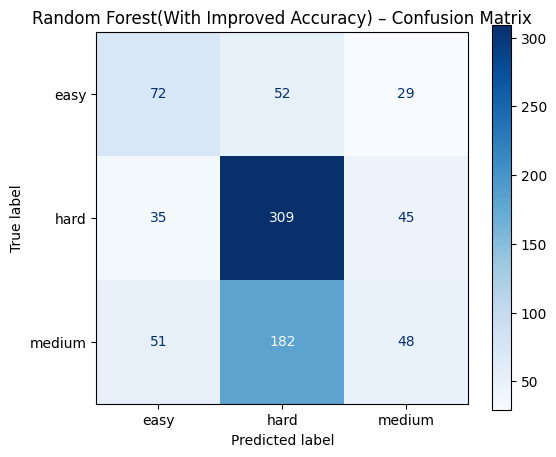

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["easy", "hard", "medium"]
cm = confusion_matrix(y_class_test, y_class_pred)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap="Blues", values_format="d")
plt.title("Random Forest(With Improved Accuracy) – Confusion Matrix")
plt.show()

# Difficulty Score Regression

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
reg = LinearRegression()
reg.fit(X_train, y_score_train)
y_score_pred = reg.predict(X_test)
mae = mean_absolute_error(y_score_test, y_score_pred)
rmse = np.sqrt(mean_squared_error(y_score_test, y_score_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 2.495633321790916
RMSE: 3.1508262679062633


# Save Trained Models

In [24]:
import joblib

In [25]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [26]:
joblib.dump(rf_clf, "difficulty_classifier.pkl")

['difficulty_classifier.pkl']

In [27]:
joblib.dump(reg, "difficulty_regressor.pkl")

['difficulty_regressor.pkl']